In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv(r"C:\Users\student\Downloads\iris\iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


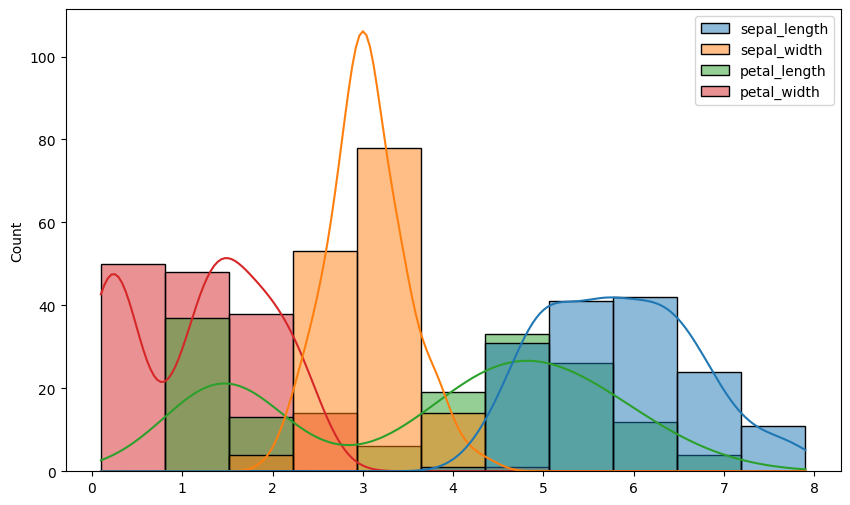

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=df, kde=True)
plt.show()

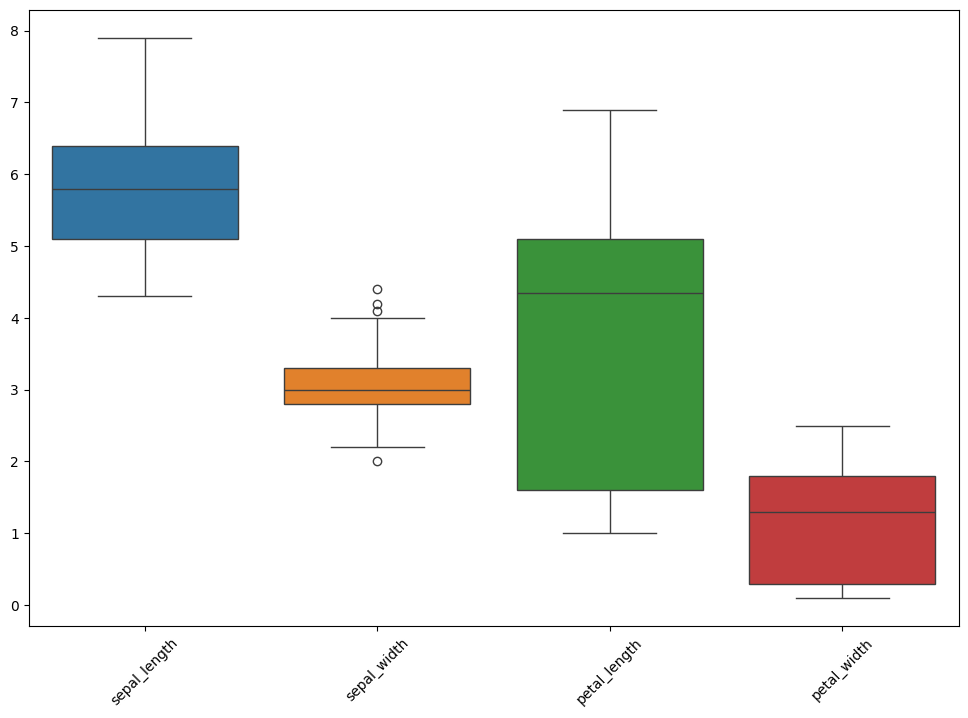

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


<Axes: >

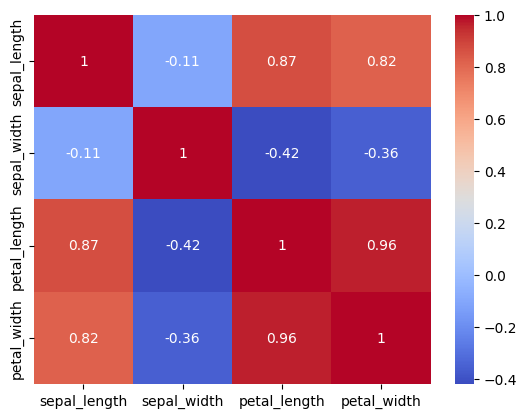

In [17]:
a = df.select_dtypes(include="number")
sns.heatmap(a.corr(),annot=True,cmap="coolwarm")

In [21]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.1 MB 11.8 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/11.1 MB 11.8 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.1 MB 11.2 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.1 MB 9.8 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.1 MB 7.7 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.1 MB 7.7 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.1 MB 7.7 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.1 MB 7.7 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.1 MB 7.7 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.1 MB 7.7 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.1 MB 7.7 MB/s eta 0:00:01
  

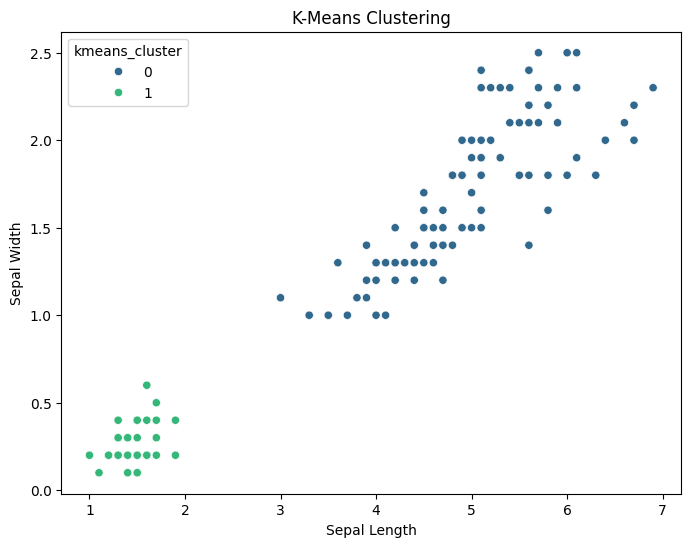

In [35]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(a)
kmeans = KMeans(n_clusters=2, random_state=42)
df['kmeans_cluster']= kmeans.fit_predict(data_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['petal_length'], y=df['petal_width'], hue=df['kmeans_cluster'], palette='viridis')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("K-Means Clustering")
plt.show()


In [43]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,kmeans_cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = df.iloc[:, :-2].values 
y = df['species'].values 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))


Logistic Regression Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


#### Accuracy, Precision, and Recall give a direct measure of how well each model separates the species(accuracy as 1)
#### so best fitted to the line
#### Logistic Regression is best for linear separability.
#### The K-Means Clustering scatter plot suggests two distinct clusters.
#### However, here the clusters is perfectly separable as 1 and 0 or segmented perfectly